# Image Classification using Convolutional Neural Network (CNN)

### Here in this example the CNN is trained on Flowers Dataset

### Importing all required libraries

In [2]:
import numpy as np
from numpy import asarray
import pandas as pd
import cv2
import glob
import os
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline 
import random

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import  img_to_array, load_img
from tensorflow.keras.optimizers import SGD

### Path of the Training Data  

In [3]:
train_dir = r'E:\Hyundai\Demo\10_Monkey_Species_Dataset\images\training'

### Pre-processing Training Data

In [4]:
X_train = []
y_train = []

# Initializing the size of the images to be used for training
m,n = 50,50

# Pre-processing the inputs for the feed the CNN Model
for dir in sorted(os.listdir(train_dir)):
    for imgname in glob.glob(os.path.join(train_dir,dir)+"\*.*"):
        img = load_img(imgname, target_size=(m, n))
        img = img_to_array(img)      
        X_train.append(img)
        y_train.append(str(dir))
               
# Converting the target names to categories
uniques, ids = np.unique(y_train, return_inverse=True)
y_train = to_categorical(ids, len(uniques))

X_train = asarray(X_train)
y_train = asarray(y_train)

print("Size of the Training Data (X_Train) = {}".format(np.shape(X_train)))
print("Size of the Training Data (y_Train) = {}".format(np.shape(y_train)))

Size of the Training Data (X_Train) = (1097, 50, 50, 3)
Size of the Training Data (y_Train) = (1097, 10)


### Path of the Testing Data  

In [5]:
test_dir = r'E:\Hyundai\Demo\10_Monkey_Species_Dataset\images\validation'

### Pre-processing Testing Data

In [6]:
X_test = []
y_test = []

# Initializing the size of the images to be used for testing
m,n = 50,50

# Pre-processing the inputs for the feed the CNN Model
for dir in sorted(os.listdir(test_dir)):
    for imgname in glob.glob(os.path.join(test_dir,dir)+"\*.*"):
        img = load_img(imgname, target_size=(m, n))
        img = img_to_array(img)      
        X_test.append(img)
        y_test.append(str(dir))
        
# Converting the target names to categories
uniques, ids = np.unique(y_test, return_inverse=True)
y_test = to_categorical(ids, len(uniques))

X_test = asarray(X_test)
y_test = asarray(y_test)

print("Size of the Testing Data (X_test) = {}".format(np.shape(X_test)))
print("Size of the Testing Data (y_test) = {}".format(np.shape(y_test)))        

Size of the Testing Data (X_test) = (272, 50, 50, 3)
Size of the Testing Data (y_test) = (272, 10)


### Defining the CNN Model 

In [7]:
num_classes = 10

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(m, n, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        1

### Training the CNN Model

In [16]:
history = model.fit(X_train, y_train, batch_size=5, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
220/220 [==============================] - 7s 32ms/step - loss: 0.3726 - acc: 0.9079 - val_loss: 2.3738 - val_acc: 0.6324
Epoch 2/2
220/220 [==============================] - 7s 31ms/step - loss: 0.4512 - acc: 0.8760 - val_loss: 2.3010 - val_acc: 0.6471


In [31]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


### Evaluating the Model Performance

##### (i) Plotting the Model's Training Accuracy

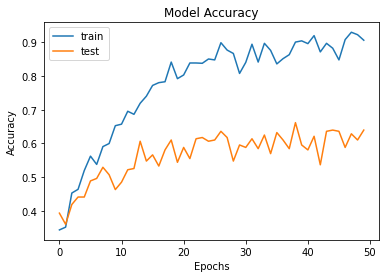

In [10]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

##### (ii) Plotting the Model's Loss 

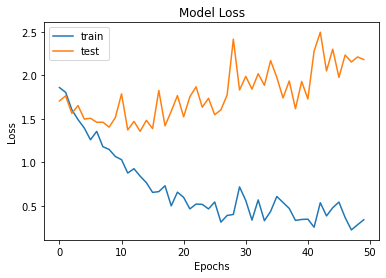

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

###  Testing/Predicting/Inferencing the Trained Model

In [15]:
# Reading the labels of the Monkey
cols = ['Label','Latin Name', 'Common Name','Train Images', 'Validation Images']
labels = pd.read_csv(r"E:\Hyundai\Demo\10_Monkey_Species_Dataset\monkey_labels.txt", names=cols, skiprows=1)
names = list(labels['Common Name'])
names

[' mantled_howler                ',
 ' patas_monkey                  ',
 ' bald_uakari                   ',
 ' japanese_macaque              ',
 ' pygmy_marmoset                ',
 ' white_headed_capuchin         ',
 ' silvery_marmoset              ',
 ' common_squirrel_monkey        ',
 ' black_headed_night_monkey     ',
 ' nilgiri_langur                ']

The testing image is E:\Hyundai\Demo\10_Monkey_Species_Dataset\images\validation\n3\n3013.jpg
[1.8607309e-03 1.5824285e-03 3.1173133e-04 9.0610403e-01 4.4288818e-02
 3.0062611e-03 6.0803420e-03 6.0976059e-03 5.2279007e-04 3.0145207e-02]
The image belongs to the Monkey Family =  japanese_macaque              


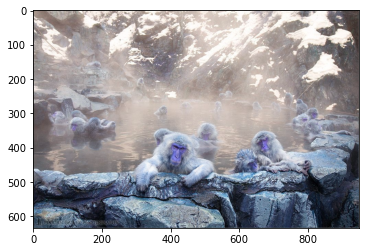

In [17]:
# Passing the Random test image for prediction

test_imgPath = random.choice(glob.glob(r'E:\Hyundai\Demo\10_Monkey_Species_Dataset\images\validation\**\*.jpg'))
print ('The testing image is {}'.format(test_imgPath))
test_img = load_img(test_imgPath, target_size=(m, n))
test_img = np.array(test_img)
test_img = test_img.reshape(1,m,n,3)
y_prob = model.predict(test_img)[0]
print (y_prob)
y_classes = y_prob.argmax(axis=-1)
print ('The image belongs to the Monkey Family = {}'.format(names[y_classes]))

# Displaying the Test Image
plt.imshow(cv2.imread(test_imgPath))
plt.show()

In [63]:
#########################################################################################################################

### Using DataGenerator, FlowFromDirectory & Fit 

In [69]:
from keras.preprocessing.image import ImageDataGenerator


# Data Augmentation with Data Generator
LR = 1e-3
height=m
width=n
channels=3
seed=1337
batch_size = 64
num_classes = 10
epochs = 2
data_augmentation = True
num_predictions = 20

# Training generator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(height,width),
                                                    batch_size=batch_size,
                                                    seed=seed,
                                                    shuffle=True,
                                                    class_mode='categorical')

# Test generator
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(height,width), 
                                                  batch_size=batch_size,
                                                  seed=seed,
                                                  shuffle=False,
                                                  class_mode='categorical')

train_num = train_generator.samples
validation_num = validation_generator.samples

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [70]:
# Training the Model

history = model.fit_generator(train_generator,
                              steps_per_epoch= train_num // batch_size,
                              epochs=epochs,
                              validation_data=train_generator,
                              validation_steps= validation_num // batch_size,
                              verbose = 1
                             )

Epoch 1/2
17/17 [==============================] - 45s 3s/step - loss: 2.3060 - acc: 0.1122 - val_loss: 2.3077 - val_acc: 0.1289
Epoch 2/2
17/17 [==============================] - 42s 2s/step - loss: 2.2988 - acc: 0.1190 - val_loss: 2.2905 - val_acc: 0.1094


In [71]:
# Saving the Trained Model to the Disk

In [81]:
model.save(r"E:\Hyundai\Demo\image_classification\model.h5")
print("Model saved to Disk !")

Model saved to Disk !


In [82]:
# Loading the model from Disk
import tensorflow as tf
new_model = tf.keras.models.load_model(r"E:\Hyundai\Demo\image_classification\model.h5")
print("Model loaded from Disk !")

Model loaded from Disk !


The testing image is E:\Hyundai\Demo\10_Monkey_Species_Dataset\images\validation\n7\n713.jpg
[0.1324232  0.1069866  0.04833351 0.05036786 0.10676721 0.08995967
 0.05130095 0.15875721 0.15695189 0.09815191]
The image belongs to the Monkey Family =  common_squirrel_monkey        


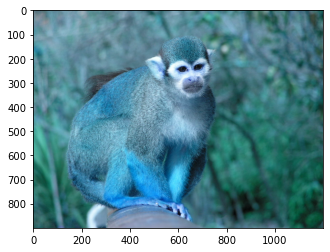

In [83]:
# Passing the Random test image for prediction

test_imgPath = random.choice(glob.glob(r'E:\Hyundai\Demo\10_Monkey_Species_Dataset\images\validation\**\*.jpg'))
print ('The testing image is {}'.format(test_imgPath))
test_img = load_img(test_imgPath, target_size=(m, n))
test_img = np.array(test_img)
test_img = test_img.reshape(1,m,n,3)
y_prob = new_model.predict(test_img)[0]
print (y_prob)
y_classes = y_prob.argmax(axis=-1)
print ('The image belongs to the Monkey Family = {}'.format(names[y_classes]))

# Displaying the Test Image
plt.imshow(cv2.imread(test_imgPath))
plt.show()

In [ ]:
# Plotting the Model (Optional --- Requires correct dependencies to be installed)

In [84]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='my_model.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
